<a href="https://colab.research.google.com/github/shahiryar/conflict-modelling/blob/main/Social_Entropy_and_Conflict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The basic assumption that motivates this notebook is that there is a relationship between the composition of a given society (defined in terms of entropy) and the probability of inter-ethnic and inter-religious conflicts.
- From theoratical point of view Johan Galtung's theory of peace in peace studies formulate that 'Social Entropy' is one of the four major factors that affect peace in a society. [More on Social Entropy](https://www.nonviolenceny.org/post/social-entropy)
- Kenath Baily extends the concept of entropy and peace to differtiate a number of types of Social Entropy to encompass Social, Economical, Political, Environmental, Developmental, Technological, and Geographical entropy.
- Currently the data used is limited and scarce which is why the hypothesis could not be ascertained.
- Increasing the amount of data and instances of societies/countries could help better understand this relationship. Moreover, adding all other forms of entropy to the dataset could create a realistic model of peace and conflict.


# Preprocessing Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/Asia-Pacific_2018-2023_Apr28-1.xlsx")

In [ ]:
df.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,AFG20,2017-01-01,2017,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,3,...,Herat,34.348,62.200,1,Herat TV; Aina TV; TOLO News; Khaama Press; Af...,Subnational-National,"Jan 1, 2017: A bomb in a Shi'a mosque in Bagh ...",1,NaN,1618518785
1,AFG17,2017-01-01,2017,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Unidentified Armed Group (Afghanistan),NaN,3,...,Hamid Karzai International Airport,34.566,69.213,1,TOLO News,National,1 Jan 2017: 3 rockets landed near Kabul airpor...,0,NaN,1580847062
2,AFG4,2017-01-01,2017,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Afghanistan),NaN,3,...,Burka,36.222,69.150,2,Afghan Islamic Press News Agency,National,"Reported on 2 Jan, 2017: 3 days of clashes bet...",0,NaN,1580847062
3,AFG34,2017-01-01,2017,2,Political violence,Explosions/Remote violence,Air/drone strike,NATO: North Atlantic Treaty Organization,Military Forces of the United States (2009-2017),8,...,Shabi,34.106,70.388,1,Pajhwok Afghan News; Khaama Press; Xinhua,National-International,1 Jan 2017: US forces staged a drone strike in...,10,NaN,1618523688
4,AFG14,2017-01-01,2017,1,Political violence,Battles,Armed clash,Military Forces of Afghanistan (2014-2021),NaN,1,...,Gurguray,34.104,70.404,1,News Yemen; Pajhwok Afghan News; Khaama Press,National-International,1 Jan 2017: 2 IS commanders captured in Afghan...,0,NaN,1631067041


In [ ]:
df.columns

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP'],
      dtype='object')

In [ ]:
df_curated = df[['EVENT_DATE','LOCATION', 'COUNTRY', 'DISORDER_TYPE','REGION' ]]

In [ ]:
df_curated.sample(5)

,EVENT_DATE,LOCATION,COUNTRY,DISORDER_TYPE,REGION
415460,2019-05-22,Bhiria,Pakistan,Political violence,South Asia
246693,2020-09-28,Dharapuram,India,Demonstrations,South Asia
151730,2019-06-11,Shinan,China,Demonstrations,East Asia
314628,2023-04-07,Tokyo - Chiyoda,Japan,Demonstrations,East Asia
79846,2016-08-04,Khagrachhari,Bangladesh,Demonstrations,South Asia


In [ ]:
locations_India = df_curated[(df_curated.COUNTRY =='India') & (df_curated.DISORDER_TYPE =='Political violence')].LOCATION.value_counts()

In [ ]:
locations_India[locations_India>100]

Srinagar             459
Kolkata              261
Naushera             186
Agartala             165
Pulwama              162
Shopian              160
Imphal               152
Poonch               145
Hiranagar            128
Patna                114
Delhi - New Delhi    113
Ludhiana             109
Sopore               108
Tral                 107
Bijapur              105
Mendhar              105
Shahpur              105
Balakote             101
Name: LOCATION, dtype: int64

<Axes: ylabel='Density'>

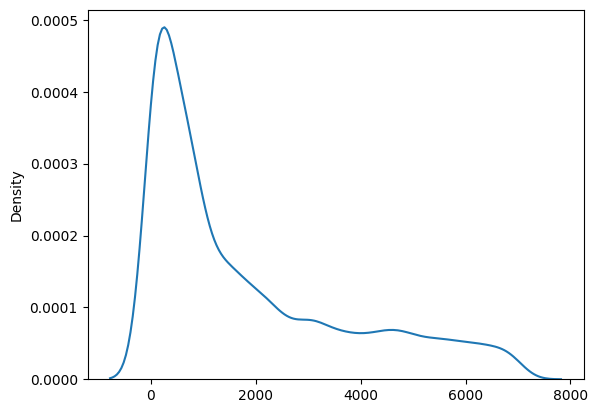

In [ ]:
_loc_data = df_curated[(df_curated.COUNTRY =='India') & (df_curated.DISORDER_TYPE =='Political violence')].LOCATION
sns.kdeplot(_loc_data.factorize()[0])

<Axes: ylabel='Density'>

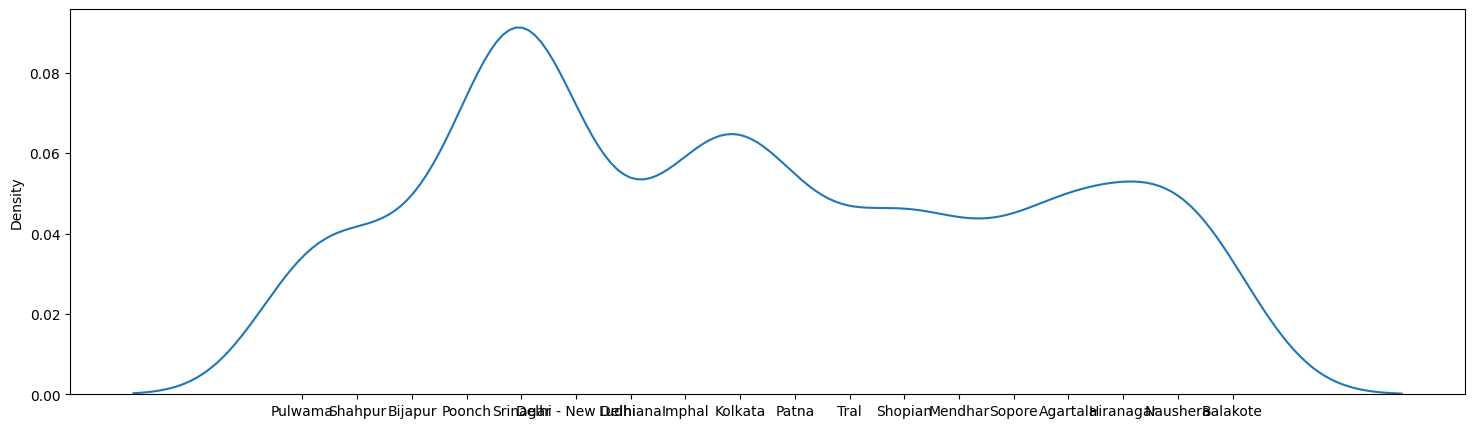

In [ ]:
_loc_data = df_curated[(df_curated.COUNTRY == 'India') & (df_curated.LOCATION.isin(locations_India[locations_India>100].index.values)) & (df_curated.DISORDER_TYPE =='Political violence')].LOCATION
xtick_labels = _loc_data.factorize()[1]
xticks = [i for i in range(0,len(xtick_labels))]
plt.figure(figsize=(18, 5))
plt.xticks(ticks=list(xticks), labels=list(xtick_labels))
sns.kdeplot(_loc_data.factorize()[0])

In [ ]:
df_curated = df_curated[(df_curated.COUNTRY == 'India') & (df_curated.LOCATION.isin(locations_India[locations_India>100].index.values)) & (df_curated.DISORDER_TYPE =='Political violence')]

In [ ]:
df_curated = df_curated[['LOCATION', 'EVENT_DATE']]

In [ ]:
df_curated

,LOCATION,EVENT_DATE
164164,Pulwama,2016-01-01
164182,Shahpur,2016-01-02
164205,Bijapur,2016-01-02
164220,Shahpur,2016-01-03
164417,Poonch,2016-01-10
...,...,...
294137,Bijapur,2023-04-18
294178,Bijapur,2023-04-18
294241,Shahpur,2023-04-20
294425,Delhi - New Delhi,2023-04-25


In [ ]:
df_curated.to_csv("/content/drive/MyDrive/Datasets/political-violence-india.csv")

In [ ]:
df_curated[(df_curated.LOCATION.isnull() | df_curated.EVENT_DATE.isnull())]

,LOCATION,EVENT_DATE


# Combining Data 

In [ ]:
df_curated = pd.read_csv("/content/drive/MyDrive/Datasets/political-violence-india.csv")

In [ ]:
import math
#Source of data: 
#labels = ('Hindu','Muslim',	'Christian',	'Sikh',	'Buddhist',	'Jain')
def calculate_entropy(label):
  population_div = {'Hiranagar' : (97.49, 0.81, 1.04, 0.51, 0.04, 0.00, 0.00, 0.12),
    'Agartala' : 	(94.09, 4.37, 0.99, 0.02, 0.28, 0.06, 0.02, 0.17),
    'Mendhar' : (0.12,99.72,0.02,0.00,0.00,0.00,0.00,0.14),
    'Shopian' : (13.12,85.94,0.41,0.34,0.01,0.00,0.00,0.18),
    'Tral' : (10.18,88.84,0.29,0.60,0.01,0.01,0.00,0.08),
    'Patna' : (91.74,7.54,0.21,0.08,0.02,0.04,0.00,0.37),
    'Kolkata' : (76.51,20.60,0.88,0.31,0.11,0.47,0.03),
    'Imphal' : (60.27,17.58,6.00,0.04,0.14,0.01,15.53),
    'Ludhiana' :(42.94,2.22,0.47,53.26,0.06,0.56,0.04),
    'Delhi - New Delhi' : (80.21,12.78,0.96,4.43,0.12,1.39,0.02),
    'Srinagar' : (3.44,95.19,0.22,0.99,0.02,0.01,0.00),
    'Pulwama' : (2.47 ,95.49 ,0.20 ,1.68 ,0.01 ,0.00 ,0.00),
    'Shahpur' : (37.32,60.40,0.11,0.01,0.02,1.86,0.00),
    'Bijapur' : (82.07, 16.97, 0.11, 0.03, 0.02, 0.40, 0.00),
    'Poonch' :(6.84,90.45, 0.20, 2.35, 0.02, 0.00, 0.00)}
  if not (label in population_div.keys()): return None
  print(label)
  data = population_div[label]
  probabilities = [p / 100 for p in data]  # Convert percentages to probabilities
  entropy = -sum(p * math.log2(p) for p in probabilities if p != 0)
  return entropy


In [ ]:
entropy_df = pd.DataFrame()
entropy_df['n_conflicts'] = df_curated.LOCATION.value_counts()
entropy_df['location'] = df_curated.LOCATION.value_counts().index

In [ ]:
entropy_df['regilion_entropy'] = entropy_df.location.map(lambda x: calculate_entropy(x))

Srinagar
Kolkata
Agartala
Pulwama
Shopian
Imphal
Poonch
Hiranagar
Patna
Delhi - New Delhi
Ludhiana
Tral
Shahpur
Mendhar
Bijapur


In [ ]:
entropy_df.dropna(inplace=True)

In [ ]:
entropy_df

,n_conflicts,location,regilion_entropy
Srinagar,459,Srinagar,0.324057
Kolkata,261,Kolkata,0.901665
Agartala,165,Agartala,0.396691
Pulwama,162,Pulwama,0.313761
Shopian,160,Shopian,0.650436
Imphal,152,Imphal,1.561091
Poonch,145,Poonch,0.543229
Hiranagar,128,Hiranagar,0.215535
Patna,114,Patna,0.459065
Delhi - New Delhi,113,Delhi - New Delhi,0.997891


<Axes: xlabel='regilion_entropy', ylabel='n_conflicts'>

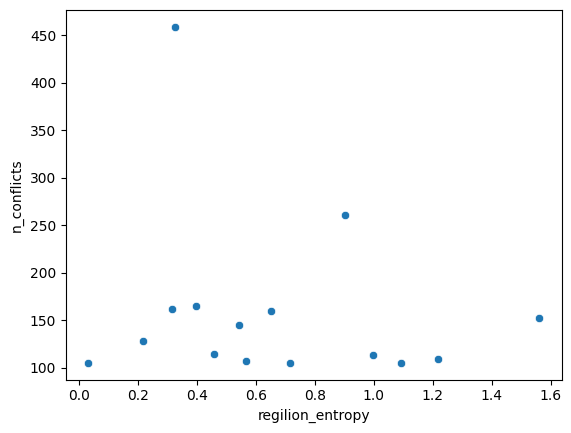

In [ ]:
sns.scatterplot(data=entropy_df, x='regilion_entropy', y ='n_conflicts'  )

<Axes: ylabel='n_conflicts'>

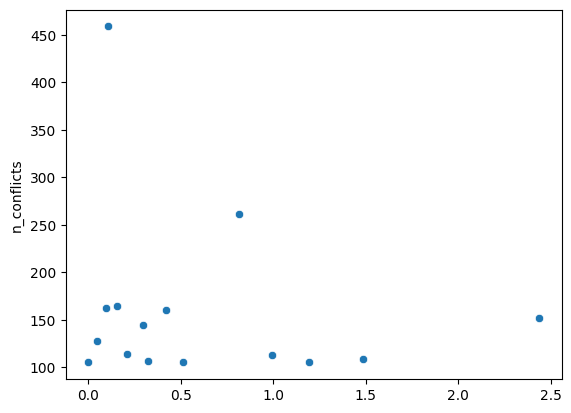

In [ ]:
sns.scatterplot(x=entropy_df.regilion_entropy.values**2, y =entropy_df.n_conflicts )

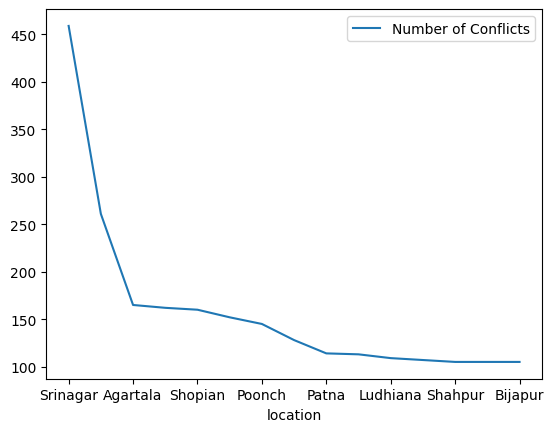

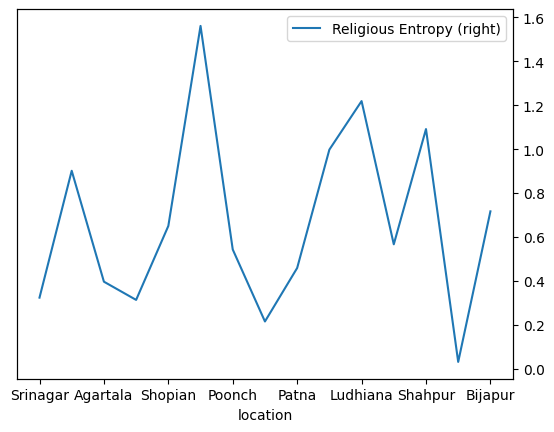

In [ ]:
# Create a line plot
entropy_df.plot(x='location', y='n_conflicts', label='Number of Conflicts')
entropy_df.plot(x='location', y='regilion_entropy', secondary_y=True, label='Religious Entropy')



# Display the plot
plt.show()

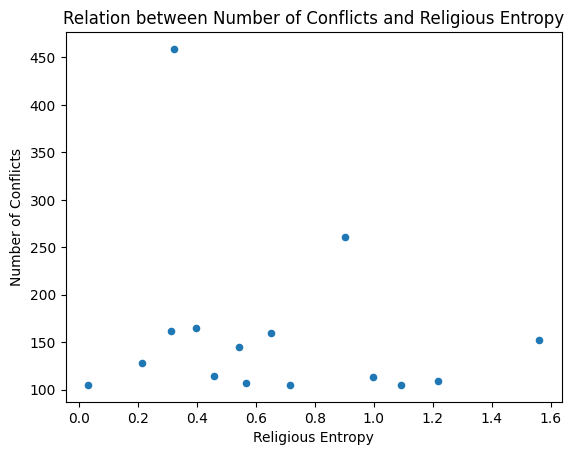

In [ ]:
# Create a scatter plot
entropy_df.plot(kind='scatter', x='regilion_entropy', y='n_conflicts')

# Add axis labels and a title
plt.ylabel('Number of Conflicts')
plt.xlabel('Religious Entropy')
plt.title('Relation between Number of Conflicts and Religious Entropy')

# Display the plot
plt.show()


- Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(entropy_df[['regilion_entropy', 'n_conflicts']])

StandardScaler()

In [ ]:
scaled_entropy_conflict =scaler.transform(entropy_df[['regilion_entropy', 'n_conflicts']])

In [ ]:
scaled_entropy_conflict.T

array([[-0.84706471,  3.35390797],
       [ 0.58408633,  1.13786644],
       [-0.66709785,  0.06342206],
       [-0.87257728,  0.02984568],
       [-0.03839058,  0.00746142],
       [ 2.21795844, -0.08207561],
       [-0.30401859, -0.16042051],
       [-1.11595263, -0.35068671],
       [-0.51255382, -0.50737651],
       [ 0.82250552, -0.51856864],
       [ 1.37007862, -0.56333716],
       [-0.24552342, -0.58572141],
       [ 1.05454304, -0.60810567],
       [-1.57216964, -0.60810567],
       [ 0.12617656, -0.60810567]])

<Axes: >

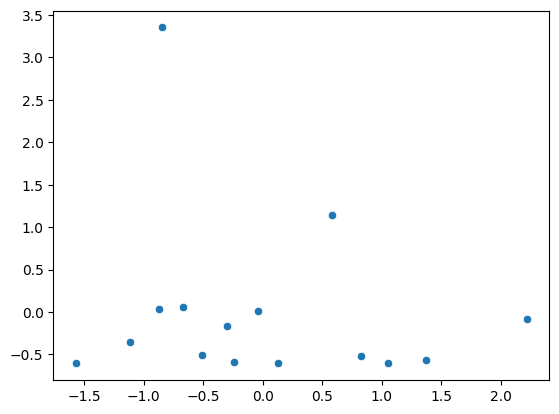

In [ ]:
sns.scatterplot(x=scaled_entropy_conflict.T[0], y =scaled_entropy_conflict.T[1]  )

- Scaling both columns does not have any effect on the plot since bother the variables are scaled
- Trying to scale dependent without scaling the independent might help unveil the under lying pattern

In [ ]:
entropy_df.regilion_entropy.values

array([0.32405735, 0.90166549, 0.39669141, 0.31376055, 0.65043573,
       1.56109124, 0.54322909, 0.21553501, 0.45906491, 0.99789074,
       1.21888955, 0.56683756, 1.09154037, 0.03140723, 0.71685452])

<Axes: >

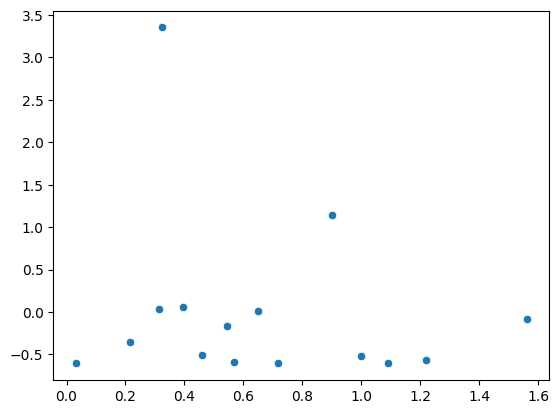

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_conflicts = scaler.fit_transform(entropy_df[['n_conflicts']])

sns.scatterplot(x=entropy_df.regilion_entropy.values, y =scaled_conflicts.T[0]  )

- Scaling does not help uncover the relation
- Trying normalization of the independent feature

In [ ]:
from scipy.stats import boxcox

<Axes: ylabel='n_conflicts'>

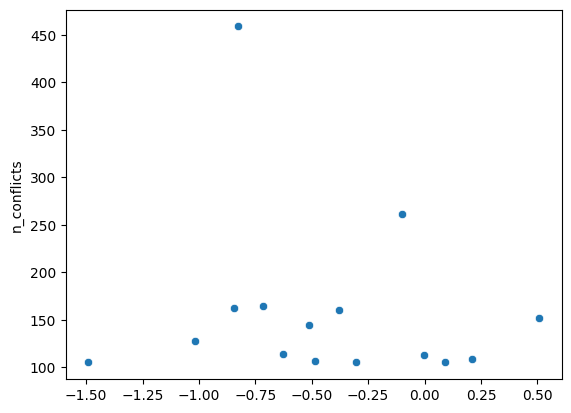

In [ ]:
normalized_entropy = boxcox(entropy_df.regilion_entropy.values)
sns.scatterplot(x=normalized_entropy[0], y =entropy_df.n_conflicts  )

In [ ]:
entropy_df.regilion_entropy.values**2

array([1.05013163e-01, 8.13000660e-01, 1.57364078e-01, 9.84456827e-02,
       4.23066639e-01, 2.43700586e+00, 2.95097839e-01, 4.64553398e-02,
       2.10740590e-01, 9.95785933e-01, 1.48569175e+00, 3.21304814e-01,
       1.19146037e+00, 9.86413985e-04, 5.13880400e-01])

In [ ]:
normalized_entropy[0]

array([-0.82670923, -0.10045885, -0.71524052, -0.84332474, -0.38055571,
        0.50835932, -0.51372793, -1.01528818, -0.62620064, -0.00211019,
        0.20977825, -0.48351913,  0.08985819, -1.49012782, -0.30265451])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(entropy_df.regilion_entropy.values.reshape(-1, 1), entropy_df.n_conflicts.values.reshape(-1, 1))

LinearRegression()

In [ ]:
lr_pred_n_conflict_wo = reg.predict(entropy_df.regilion_entropy.values.reshape(-1, 1))

<Axes: xlabel='regilion_entropy', ylabel='n_conflicts'>

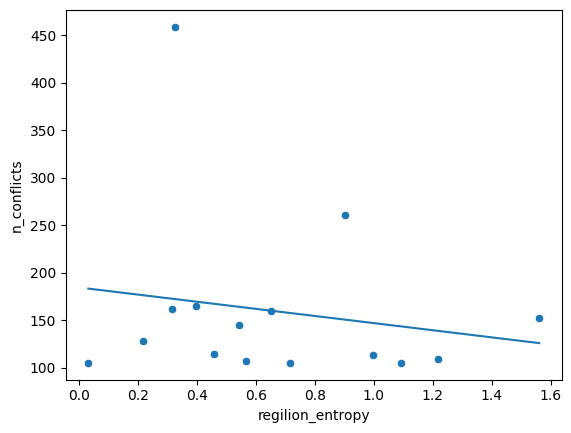

In [ ]:
sns.lineplot(x=entropy_df.regilion_entropy.values, y=lr_pred_n_conflict.T[0])
sns.scatterplot(data=entropy_df, x='regilion_entropy', y ='n_conflicts'  )

- It seems that the outliers are overpowering the relation
- Trying to remove them might help

In [ ]:
import numpy as np
entropy_df_rm_outliers= entropy_df[np.abs(entropy_df.n_conflicts-entropy_df.n_conflicts.mean())<=(3*entropy_df.n_conflicts.std())] 

In [ ]:
reg = LinearRegression()
reg.fit(entropy_df_rm_outliers.regilion_entropy.values.reshape(-1, 1), entropy_df_rm_outliers.n_conflicts.values.reshape(-1, 1))

LinearRegression()

<Axes: xlabel='regilion_entropy', ylabel='n_conflicts'>

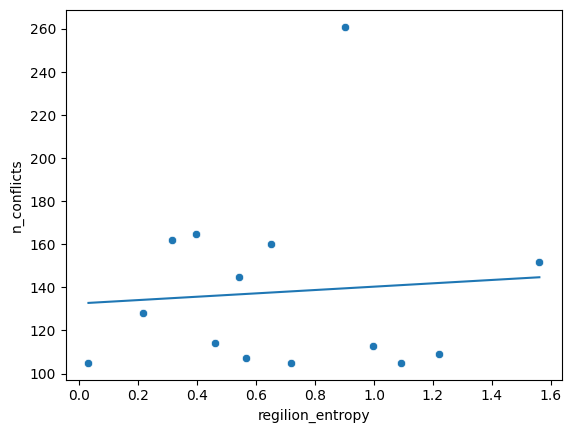

In [ ]:
lr_pred_n_conflict = reg.predict(entropy_df_rm_outliers.regilion_entropy.values.reshape(-1, 1))
sns.lineplot(x=entropy_df_rm_outliers.regilion_entropy.values, y=lr_pred_n_conflict.T[0])
sns.scatterplot(data=entropy_df_rm_outliers, x='regilion_entropy', y ='n_conflicts'  )

Using support vector regression

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(entropy_df_rm_outliers.regilion_entropy.values.reshape(-1, 1), entropy_df_rm_outliers.n_conflicts.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<Axes: xlabel='regilion_entropy', ylabel='n_conflicts'>

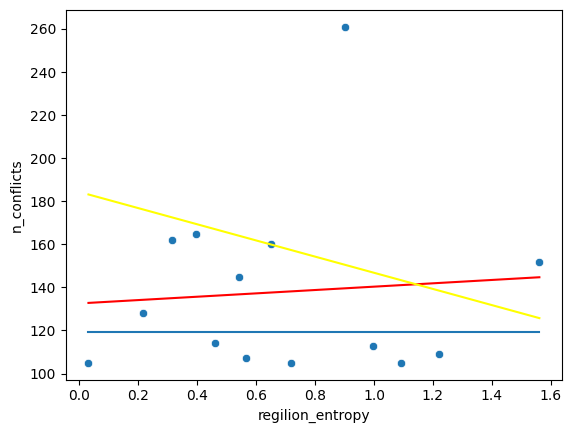

In [ ]:
svr_pred_n_conflict = svr.predict(entropy_df_rm_outliers.regilion_entropy.values.reshape(-1, 1))
sns.lineplot(x=entropy_df_rm_outliers.regilion_entropy.values, y=svr_pred_n_conflict.T[0])
sns.scatterplot(data=entropy_df_rm_outliers, x='regilion_entropy', y ='n_conflicts'  )
sns.lineplot(x=entropy_df_rm_outliers.regilion_entropy.values, y=lr_pred_n_conflict.T[0], color='red')
sns.lineplot(x=entropy_df.regilion_entropy.values, y=lr_pred_n_conflict_wo.T[0], color='yellow')